# Continuous-variable MI in JIDT -- Kernel estimator

In this activity, we continue to analyse the 2coupledRandomCols-1.txt data set (which has variable 1 as a noisy lagged copy of Gaussian variable 0). We measured MI of this data set earlier using a linear-Gaussian estimator during the Part 2 of the lecture.
<br>
1. Select Kernel estimator. Ensure that the 2coupledRandomCols-1.txt data set is still selected.
<br>

2. Set the TIME_DIFF parameter to 1 again. (Note these are always reset to defaults when you change the estimator). Leave the KERNEL_WIDTH parameter at its default (0.25).
<br>

3. Press Compute.<br>
    a. Note the answer (it's in bits).<br>
    b. How close is it to the answer we measured (in nats) using the linear-Gaussian estimator?<br>
    c. Why might it be different? Hint: Think about the assumptions of each estimator and their properties.


4. Change the kernel width from 0.1 up to 1.0 in increments of 0.05, pressing compute and noting the answer each time.<br>
    a. You should alter the code template to do this in a for loop, and indeed in Matlab save and plot the results. (Recall that you need to call <b>initialise()</b> after <b>setProperty()</b> when changing properties such as the kernel width).<br>
    
    b. How does the answer vary as a function of the kernel width? How is the question the estimator is asking varying as we change the kernel width? Is there an obvious kernel width that you should use?

In [3]:
from jpype import *
import numpy as np
import sys
# Our python data file readers are a bit of a hack, python users will do better on this:
sys.path.append("/Users/juliocorrearios/Dropbox/MCSX/Semester2/InformationTheory/JIDT/infodynamics-dist-1.5/demos/python")
import readFloatsFile

# Add JIDT jar library to the path
jarLocation = "/Users/juliocorrearios/Dropbox/MCSX/Semester2/InformationTheory/JIDT/infodynamics-dist-1.5/infodynamics.jar"
# Start the JVM (add the "-Xmx" option with say 1024M if you get crashes due to not enough memory space)
startJVM(getDefaultJVMPath(), "-ea", "-Djava.class.path=" + jarLocation)



In [4]:

# 0. Load/prepare the data:
dataRaw = readFloatsFile.readFloatsFile("/Users/juliocorrearios/Dropbox/MCSX/Semester2/InformationTheory/JIDT/infodynamics-dist-1.5/demos/data/2coupledRandomCols-1.txt")
# As numpy array:
data = np.array(dataRaw)
source = JArray(JDouble, 1)(data[:,0].tolist())
destination = JArray(JDouble, 1)(data[:,1].tolist())


In [5]:
# 1. Construct the calculator:
calcClass = JPackage("infodynamics.measures.continuous.kernel").MutualInfoCalculatorMultiVariateKernel
calc = calcClass()
# 2. Set any properties to non-default values:
calc.setProperty("TIME_DIFF", "1")
calc.setProperty("KERNEL_WIDTH", "0.1")
# 3. Initialise the calculator for (re-)use:
calc.initialise()
# 4. Supply the sample data:
calc.setObservations(source, destination)
# 5. Compute the estimate:
result = calc.computeAverageLocalOfObservations()

print("MI_Kernel(col_0 -> col_1) = %.4f bits" %
    (result))


MI_Kernel(col_0 -> col_1) = 1.9357 bits


In [6]:
# 1. Set the initial variables
k_widths = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
MI_list = []

for k in k_widths:
    # 2. Set any properties to each element of the list of widths:
    calc.setProperty("KERNEL_WIDTH", str(k))
    
    # 3. Initialize the calculator to (re-)use
    calc.initialise()
    
    # 4. Supply the sample data:
    calc.setObservations(source, destination)
    
    # 5. Append to a list:
    MI_list.append(calc.computeAverageLocalOfObservations())

Text(0.5, 0, 'Kernel width')

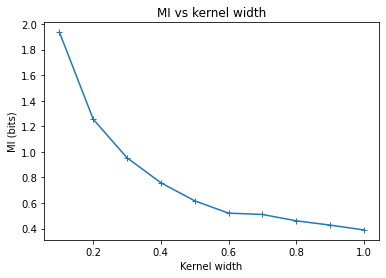

In [7]:
import matplotlib.pyplot as plt

plt.plot(k_widths,MI_list,"-+")
plt.title(r"MI vs kernel width")
plt.ylabel("MI (bits)")
plt.xlabel("Kernel width")

## Continuous-variable MI in JIDT -- KSG estimator

In this activity, we continue to analyse the 2coupledRandomCols-1.txt data set, this time with the KSG estimator.

1. Select Kraskov (KSG) alg. 2 estimator. Ensure that the 2coupledRandomCols-1.txt data set is still selected.
<br>

2. Set the TIME_DIFF parameter to 1 again. (Note these are always reset to defaults when you change the estimator). Leave the k (nearest neighbours) parameter at its default (4).
<br>

3. Press Compute.

    a. Note the answer (it's in nats). Press Compute again -- note that the answer changes slightly due to some stochastic noise we add to the data (to keep the KSG algorithm stable).<br>
    b. How close is it to the answer we measured (in nats) using the linear-Gaussian estimator?<br>
    c. Why might this estimate be closer than that with the Kernel estimator?<br>
    d. Given that we know the underlying data are linearly coupled Gaussians, which estimator do you think is best to use?


4. Change the number of nearest neighbours parameter k from 4 up to 15, pressing compute and noting the answer each time.

    a. You should alter the code template to do this in a for loop, and indeed in Matlab save and plot the results. (Recall that you need to call initialise() after setProperty() when changing properties such as k).<br>
    b. How does the answer vary as a function of k? Does it appear more stable to parameters than the Kernel estimator? How is the question the estimator is asking vary as we change k? Our lecture notes suggested leaving k at 4 was a good default option: review the results here and reflect on that.

In [9]:
dataRaw_KS = readFloatsFile.readFloatsFile("/Users/juliocorrearios/Dropbox/MCSX/Semester2/InformationTheory/JIDT/infodynamics-dist-1.5/demos/data/2coupledRandomCols-1.txt")

# As numpy array:
dataKS = np.array(dataRaw_KS)
sourceKS = JArray(JDouble, 1)(dataKS[:,0].tolist())
destinationKS = JArray(JDouble, 1)(dataKS[:,1].tolist())

# 1. Construct the calculator:
calcClass = JPackage("infodynamics.measures.continuous.kraskov").MutualInfoCalculatorMultiVariateKraskov2
calc = calcClass()
# 2. Set any properties to non-default values:
calc.setProperty("TIME_DIFF", "1")

# 3. Initialise the calculator for (re-)use:
calc.initialise()
# 4. Supply the sample data:
calc.setObservations(sourceKS, destinationKS)
# 5. Compute the estimate:
result = calc.computeAverageLocalOfObservations()

print("MI_Kraskov (KSG) alg. 2(col_0 -> col_1) = %.4f nats" %
    (result))


MI_Kraskov (KSG) alg. 2(col_0 -> col_1) = 0.4217 nats


In [10]:
# 1. Set the initial variables
ks = [4,5,6,7,8,9,10,11,12,13,14,15,16]
MI_kraskov = []

for k in ks:
    # 2. Set any properties to each element of the list of widths:
    calc.setProperty("k", str(k))
    
    # 3. Initialize the calculator to (re-)use
    calc.initialise()
    
    # 4. Supply the sample data:
    calc.setObservations(sourceKS, destinationKS)
    
    # 5. Append to a list:
    MI_kraskov.append(calc.computeAverageLocalOfObservations())

Text(0.5, 0, 'KNNs')

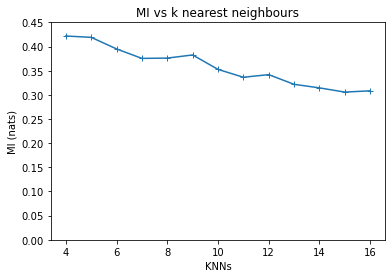

In [11]:
import matplotlib.pyplot as plt

plt.plot(ks,MI_kraskov,"-+")
plt.title(r"MI vs k nearest neighbours")
plt.ylabel("MI (nats)")
plt.ylim((0,0.45))
plt.xlabel("KNNs")

## Heart-breath interaction MI analysis
In this activity, we analyse the <b>SFI-heartRate_breathVol_bloodOx-extract.txt</b> data set (in the folder demos/data/). This includes (in each column) the heart rate, breath rate and blood oxygen concentration data for a sleeping patient who has sleep apnoea. Full data credits are available in the header comments in the data file. The first column is heart rate, the second is chest volume, and the third is blood oxygen concentration.

You can plot e.g. the heart rate in Python via:

1. Change directory in Matlab to demos/data.
2. Load the data: data = load('SFI-heartRate_breathVol_bloodOx-extract.txt')
3. Plot the heart-rate data from the first column: plt.plot(data[:,0])

Text(0, 0.5, 'Heart rate')

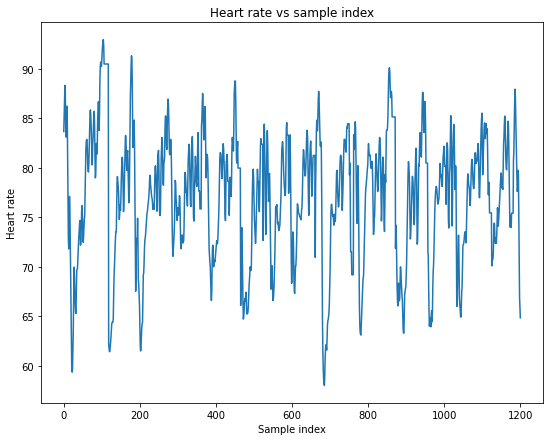

In [44]:
data = readFloatsFile.readFloatsFile("/Users/juliocorrearios/Dropbox/MCSX/Semester2/InformationTheory/JIDT/infodynamics-dist-1.5/demos/data/SFI-heartRate_breathVol_bloodOx-extract.txt")

# As numpy array:
data = np.array(data)

plt.figure(figsize=(9,7))
plt.plot(data[:,0])
plt.title("Heart rate vs sample index")
plt.xlabel("Sample index")
plt.ylabel("Heart rate")

Selecting the first column here selects the heart rate data only. You can see the apnoea incidents when the heart rate dramatically rises and falls.

Here we wish to investigate whether there is a relationship between heart and breath rate in the data set.

**A. Linear-Gaussian estimator**

1. Using the MI AutoAnalyser, select Gaussian estimator.
2. Select the SFI-heartRate_breathVol_bloodOx-extract.txt data set.
3. Set the source column to 0 (heart rate) and destination column to 1 (breath rate).
4. Press Compute.<br>
 a. Note the answer (it's in nats).<br>
 b. Does this appear to indicate a relationship between heart rate and breath rate?<br>
 c. What happens if you scan the TIME_DIFF parameter to look for a lagged relationship? (Optional Challenge: you could alter the code template to do this in a for loop, and indeed in Matlab save and plot the results.)<br>
 d. What can you conclude from the results? Is there no relationship at all between the variables?<br>

In [20]:
source = data[:,0].tolist()
destination = data[:,1].tolist()

# 1. Construct the calculator:
calcClass = JPackage("infodynamics.measures.continuous.gaussian").MutualInfoCalculatorMultiVariateGaussian
calc = calcClass()
# 2. Set any properties to non-default values:
# No properties were set to non-default values
# 3. Initialise the calculator for (re-)use:
calc.initialise()
# 4. Supply the sample data:
calc.setObservations(source, destination)
# 5. Compute the estimate:
result = calc.computeAverageLocalOfObservations()

print("MI_Gaussian(col_0 -> col_1) = %.4f nats" %
    (result))


MI_Gaussian(col_0 -> col_1) = 0.0015 nats


In [24]:
timeDiff = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
MI_timeDiff = []

for tm in timeDiff:
    # 2. Set any properties to each element of the list of widths:
    calc.setProperty('TIME_DIFF', str(tm))
    
    # 3. Initialize the calculator to (re-)use
    calc.initialise()
    
    # 4. Supply the sample data:
    calc.setObservations(source, destination)
    
    # 5. Append to a list:
    MI_timeDiff.append(calc.computeAverageLocalOfObservations())

Text(0, 0.5, 'MI (nats)')

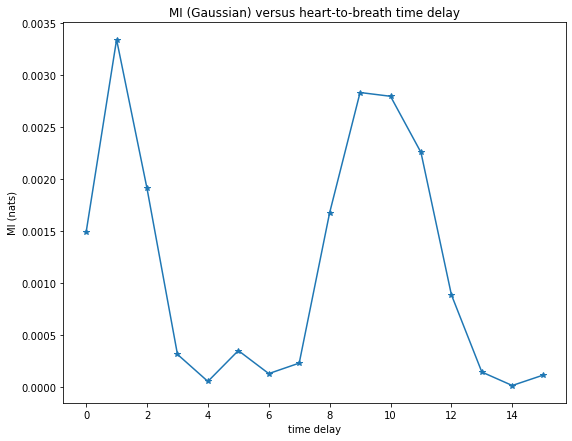

In [41]:
plt.figure(figsize=(9,7))
plt.plot(MI_timeDiff,marker='*')
plt.title("MI (Gaussian) versus heart-to-breath time delay")
plt.xlabel("time delay")
plt.ylabel("MI (nats)")

**B. KSG estimator**

1. Select Kraskov (KSG) alg. 2 estimator. Ensure that the <b>SFI-heartRate_breathVol_bloodOx-extract.txt</b> data set is still selected.
2. Set the TIME_DIFF parameter to 0 again. (Note these are always reset to defaults when you change the estimator). Leave the k (nearest neighbours) parameter at its default (4).
3. Press Compute.<br>
 a. Notice whether it is faster or slower than the linear-Gaussian calculator was. You may not notice a difference on this short data set -- if not, try both estimators on the full SFI-heartRate_breathVol_bloodOx.txt data set<br>
 b. Note the answer (it's in nats).<br>
 c. How different is it to the answer we measured (in nats) using the linear-Gaussian estimator?<br>
 d. Why might this estimate be different to that obtained with the linear-Gaussian estimator?<br>
 f. Does this change your conclusions on whether there is a relationship between the variables?<br>
 g. Reflect on the differences between the estimator types, their properties and what they can measure. You could plot the data to check for any relationship yourself (e.g. in Matlab:plot(data(:,1), data(:,2), 'x');).<br>
4. What happens if you scan the TIME_DIFF parameter to look for a lagged relationship?<br>
 a. Optional Challenge: you could alter the code template to do this in a <b>for</b> loop, and indeed in Python save and plot the results.<br>
 b. What does it mean that the MI(heart; breath) is large over not just one TIME_DIFF but several? Are these earlier values of heart rate providing the same or different information about the destination breath variable? How could you investigate this further? (Think about how a conditional mutual information could be used to investigate this)



Sample solutions (try it first!): code  download, and sample plot below

In [26]:
calcClass = JPackage("infodynamics.measures.continuous.kraskov").MutualInfoCalculatorMultiVariateKraskov2
calc = calcClass()
# 2. Set any properties to non-default values:
# No properties were set to non-default values
# 3. Initialise the calculator for (re-)use:
calc.initialise()
# 4. Supply the sample data:
calc.setObservations(source, destination)
# 5. Compute the estimate:
result = calc.computeAverageLocalOfObservations()

print("MI_Kraskov (KSG) alg. 2(col_0 -> col_1) = %.4f nats" %
    (result))

MI_Kraskov (KSG) alg. 2(col_0 -> col_1) = 0.1344 nats


In [34]:
timeDiff = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15] 
# timeDiff = np.arange(0,16,1) / straight way to build it

MI_timeDiffKsg = []

for tm in timeDiff:
    # 2. Set any properties to each element of the list of widths:
    calc.setProperty('TIME_DIFF', str(tm))
    
    # 3. Initialize the calculator to (re-)use
    calc.initialise()
    
    # 4. Supply the sample data:
    calc.setObservations(source, destination)
    
    # 5. Append to a list:
    MI_timeDiffKsg.append(calc.computeAverageLocalOfObservations())


Text(0, 0.5, 'MI (nats)')

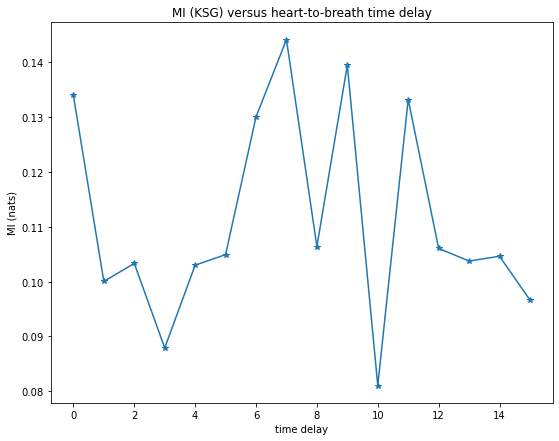

In [42]:

plt.figure(figsize=(9,7))
plt.plot(MI_timeDiffKsg,marker='*')
plt.title("MI (KSG) versus heart-to-breath time delay")
plt.xlabel("time delay")
plt.ylabel("MI (nats)")
